# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.decomposition.pca import PCA
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold

# Load Dataset

In [2]:
data = pd.read_csv("train.csv") 
data

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,33.992563,-117.895997,No.7 Queen Size Cozy Room 舒适大床房,NaN,2,90.0,https://a0.muscache.com/im/pictures/8d2f08ce-b...,91748,1.0,1.0


# Initial Data Exploration

In [3]:
# Columns of Dataset
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [4]:
# Shape of Dataset
print("Number of Records : %d" %(data.shape[0]))
print("Number of Features : %d"%(data.shape[1]))

Number of Records : 74111
Number of Features : 29


In [5]:
data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


# Data Visualisation

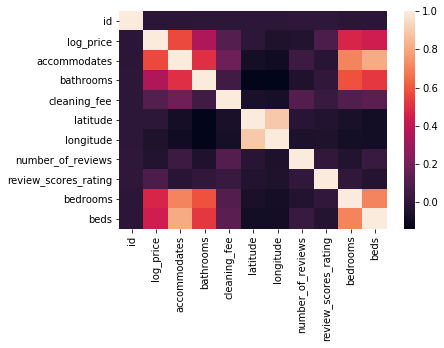

In [6]:
# Correlation Scatter plot
plt.figure()
sns.heatmap(data.corr())

## Correlation Analysis

From the correlation scatterplot, the following observations and relationships were established:

1. The target *log price* is positively correlated to the features of *accommodates*, *bedrooms*, *beds* and *bathrooms*. This goes on to ascertain the fact that rooms and accommodations are crucial factors in driving the price of the property. 

2. Features *accommodates* and *beds* are highly correlated to each other. These features describes the space associated with the property and provide a valuable asset in evaluating the property rates.

3. Features *bathrooms* and *bedrooms* are highly correlated to each other. This is evident as the serve as the description of rooms in the property and hold a significant value to the prices.

4. The features *cleaning_fee*, *number_of_reviews* and *review_scores_rating*  of the dataset is not much related with rest of the features.

5. The *latitude* and *longitude* features are very closely related to each other but not much to rest of the features.

---

# Data Preprocessing and Cleaning

### Drop Irrelevant Features


***id*** : Not related to actual property rates.

***description*** : Overivew of the property. Does not hold significance to actual property rates.

***first_review*** : Has a high unique count with the date when the first review made being irrelevant to property rates.

***host_since*** : Does not have any relation with the property listing and thus holds no importance.

***last_review*** : Has a high unique count with the date when the last review made being irrelevant to property rates.

***name*** : Not related to actual property rates and holds no importance.

***thumbnail_url*** : Useful for visual analysis. Not a part of the project scope.

***zipcode*** : Has a high unique count. Features of *latitude* and *longitude* have lower unique counts and thus, capture the geographical information in a better way.

In [7]:
columns = ['id', 'description', 'first_review', 'host_since', 'last_review', 'name', 'thumbnail_url', 'zipcode']
data.drop(columns, inplace = True, axis=1)

### Convert to Numeric and Binary Data

In [8]:
data['cleaning_fee'] =  data['cleaning_fee'].astype(int)
data['host_has_profile_pic'] = data['host_has_profile_pic'].map({'f': 0, 't': 1})
data['host_identity_verified'] = data['host_identity_verified'].map({'f': 0, 't': 1})
data['instant_bookable'] = data['instant_bookable'].map({'f': 0, 't': 1})

In [9]:
def process_host_resp(s):
    if isinstance(s, str):
        return float(s[:-1])
        
data['host_response_rate'] = data['host_response_rate'].apply(process_host_resp)

### One Hot Encoding

In [10]:
categorical=['property_type','room_type','bed_type','cancellation_policy', 'city', 'neighbourhood']
data = pd.get_dummies(data, columns=categorical)

In [11]:
data['amenities'] = data['amenities'].apply(lambda s: s.replace('"', "").replace('{', "").replace('}', ""))
data['amenities'] = data['amenities'].apply(lambda s: s.split(","))

In [12]:
# Transform between iterable of iterables and a multilabel format
# Function to label encode categorical variables
mlb = MultiLabelBinarizer()
data = data.join(pd.DataFrame(mlb.fit_transform(data.pop('amenities')), columns=mlb.classes_, index=data.index))

### Handle Missing Values

In [13]:
# Features having missing values
missing = data.isnull().values.any()
if missing:
    for cols in data.columns[data.isnull().any()]:
        print(cols)

bathrooms
host_has_profile_pic
host_identity_verified
host_response_rate
review_scores_rating
bedrooms
beds


In [14]:
# Replace the missing data with the median value for the features  
data = data.fillna(data.median())

### Dataset Splitting into Features and Target Variables

In [15]:
labels = data['log_price']
data = data.drop('log_price', axis=1)

### Feature Scaling using Data Normalization

In [16]:
data = (data - data.min())/(data.max() - data.min())

## Evaluating performance of each model using the MSE and R2 score metrics

In [19]:
def results(model, X_train, X_test, y_train, y_test):
    y_tred = model.predict(X_train)
    trmse_score = mean_squared_error(y_train, y_tred)

    y_pred = model.predict(X_test)
    temse_score = mean_squared_error(y_test, y_pred)
    
    r2e_score = r2_score(y_test, y_pred)

    return y_pred, trmse_score, temse_score, r2e_score

# Lasso Regression

In [20]:
def lasso_reg_model(data_train, data_test, labels_train, labels_test):
  cov_matrix = data_train.cov()
  eigen_values,eigen_vectors = np.linalg.eig(cov_matrix)

  pca = PCA(n_components = 85) 
  pca.fit(data_train) # fit using train and transform train and test data
  data_train = pd.DataFrame(pca.transform(data_train)) 
  data_test = pd.DataFrame(pca.transform(data_test))

  reg = LassoCV(cv = 10).fit(data_train,labels_train)
  labels_pred, train_mse, test_mse, r2_Score = results(reg, data_train, data_test, labels_train, labels_test) 

  print("R2 score : ", r2_Score)

  df=pd.DataFrame({'x': range(len(labels_test)), 'test': labels_test, 'predicted': labels_pred})
  plt.plot( 'x', 'test', data=df)
  plt.plot( 'x', 'predicted', data=df)
  plt.show()
  
  print("Train error: ",train_mse)
  print("Test error: ",test_mse)

  return train_mse,test_mse,r2_Score

Round:  1

R2 score :  0.5851525348580304


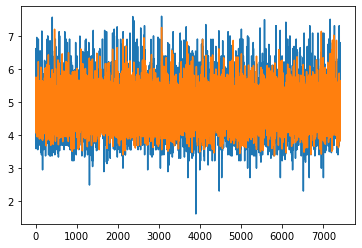

Train error:  0.2133258682093474
Test error:  0.21193306235129486

Round:  2

R2 score :  0.5913233491353671


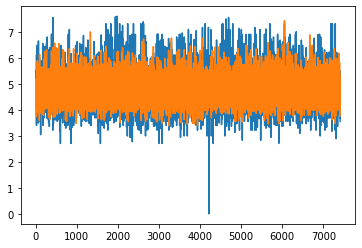

Train error:  0.21512224980214
Test error:  0.20919271400493505

Round:  3

R2 score :  0.5908282825809765


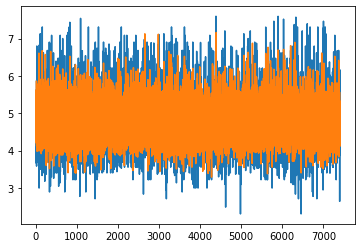

Train error:  0.2140671164207485
Test error:  0.212252508832923

Round:  4

R2 score :  0.5929279535202618


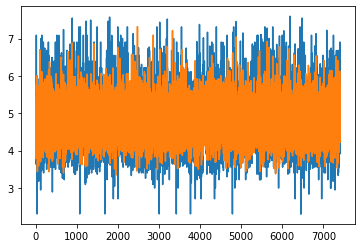

Train error:  0.21306792940462738
Test error:  0.21898144742394143

Round:  5

R2 score :  0.5964615532824278


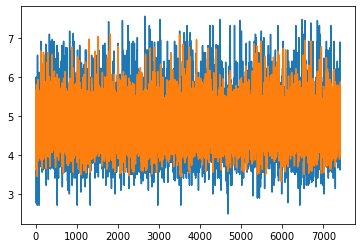

Train error:  0.21459565313676685
Test error:  0.2079886292889102

Round:  6

R2 score :  0.5769246058812971


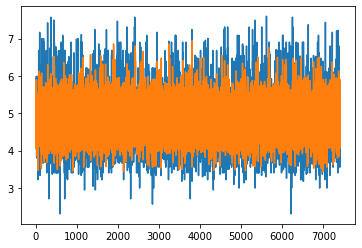

Train error:  0.214400208004125
Test error:  0.2130956550785782

Round:  7

R2 score :  0.5793304460045039


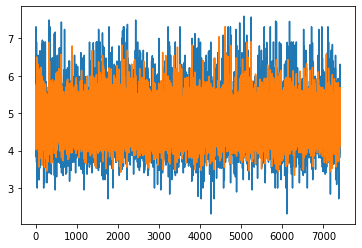

Train error:  0.2140413953435728
Test error:  0.20940301779815654

Round:  8

R2 score :  0.5764785306723375


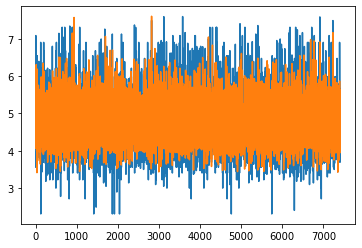

Train error:  0.2127171511202847
Test error:  0.21861528841190597

Round:  9

R2 score :  0.5703720180413718


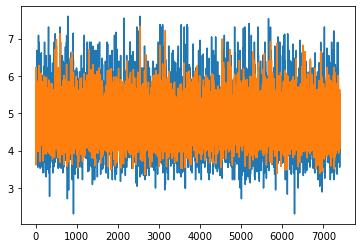

Train error:  0.2135634853865938
Test error:  0.21556122328310465

Round:  10

R2 score :  0.5761128556008932


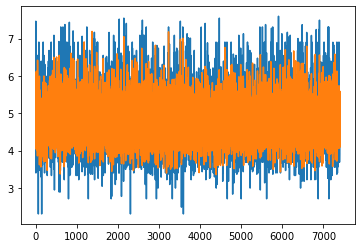

Train error:  0.21278731552242297
Test error:  0.2254578572691198


Lasso Regression
Train MSEs
[0.2133258682093474, 0.21512224980214, 0.2140671164207485, 0.21306792940462738, 0.21459565313676685, 0.214400208004125, 0.2140413953435728, 0.2127171511202847, 0.2135634853865938, 0.21278731552242297]
Test MSEs
[0.21193306235129486, 0.20919271400493505, 0.212252508832923, 0.21898144742394143, 0.2079886292889102, 0.2130956550785782, 0.20940301779815654, 0.21861528841190597, 0.21556122328310465, 0.2254578572691198]
R2 scores
[0.5851525348580304, 0.5913233491353671, 0.5908282825809765, 0.5929279535202618, 0.5964615532824278, 0.5769246058812971, 0.5793304460045039, 0.5764785306723375, 0.5703720180413718, 0.5761128556008932]

Lasso Regression Results
Train MSE after 10-fold CV:  0.21376883723506293
Test MSE after 10-fold CV:  0.21424814037428694
R2 score after 10-fold CV:  0.5835912129577467


In [22]:
# Run Lasso Regression

lasso_test_list, lasso_train_list, lasso_r2_score = [], [], []

# Perform 10 fold cross validation
kf, index = KFold(n_splits=10), 1
train_error_lasso, test_error_lasso, r2_score_avg_lasso = 0, 0, 0

for train_index, test_index in kf.split(data):
  print("Round: ",str(index))
  X_train, X_test = data.loc[train_index], data.loc[test_index]
  y_train, y_test = labels.loc[train_index], labels.loc[test_index]
  
  print()

  train_mse_lasso,test_mse_lasso, r2_score_lasso = lasso_reg_model(X_train, X_test, y_train, y_test)
  lasso_test_list.append(test_mse_lasso)
  lasso_train_list.append(train_mse_lasso)
  lasso_r2_score.append(r2_score_lasso)

  print()

  train_error_lasso += train_mse_lasso
  test_error_lasso += test_mse_lasso
  r2_score_avg_lasso += r2_score_lasso
  index += 1

print()

print ("Lasso Regression")
print("Train MSEs")
print(lasso_train_list)
print("Test MSEs")
print(lasso_test_list)
print("R2 scores")
print(lasso_r2_score)

print()

print ("Lasso Regression Results")
print("Train MSE after 10-fold CV: ", str(train_error_lasso/10))
print("Test MSE after 10-fold CV: ", str(test_error_lasso/10))
print("R2 score after 10-fold CV: ", str(r2_score_avg_lasso/10))

# Ridge Regression

In [23]:
def ridge_reg_model(data_train, data_test, labels_train, labels_test):
  cov_matrix = data_train.cov()
  eigen_values,eigen_vectors = np.linalg.eig(cov_matrix)

  pca = PCA(n_components = 85) 
  pca.fit(data_train) # fit using train and transform train and test data
  data_train = pd.DataFrame(pca.transform(data_train)) 
  data_test = pd.DataFrame(pca.transform(data_test))

  reg = RidgeCV(cv = 10).fit(data_train,labels_train)
  labels_pred, train_mse, test_mse, r2_Score = results(reg, data_train, data_test, labels_train, labels_test) 

  print("R2 score : ", r2_Score)

  df=pd.DataFrame({'x': range(len(labels_test)), 'test': labels_test, 'predicted': labels_pred })
  plt.plot( 'x', 'test', data=df)
  plt.plot( 'x', 'predicted', data=df)
  plt.show()
  
  print("Train error: ",train_mse)
  print("Test error: ",test_mse)

  return train_mse,test_mse,r2_Score

Round:  1

R2 score :  0.5824500429131247


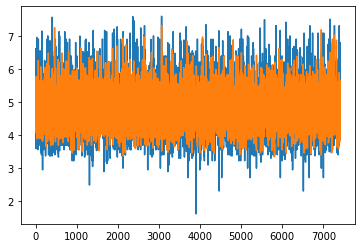

Train error:  0.21406588758091624
Test error:  0.2133136840062146

Round:  2

R2 score :  0.5933070340902122


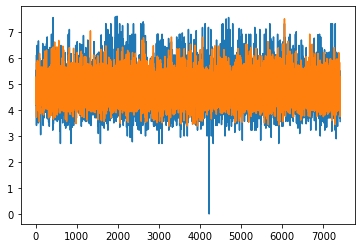

Train error:  0.21412626567407503
Test error:  0.2081773086996482

Round:  3

R2 score :  0.592777732267407


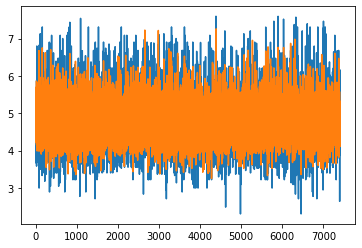

Train error:  0.21317099247032004
Test error:  0.21124125715258094

Round:  4

R2 score :  0.5936080406846497


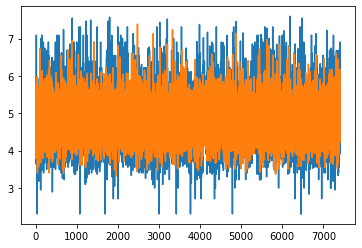

Train error:  0.2123710082068661
Test error:  0.21861559947903839

Round:  5

R2 score :  0.5978994322993347


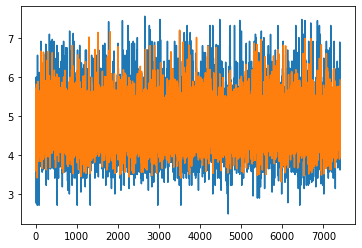

Train error:  0.21403631861741515
Test error:  0.20724752893467535

Round:  6

R2 score :  0.5791029379947321


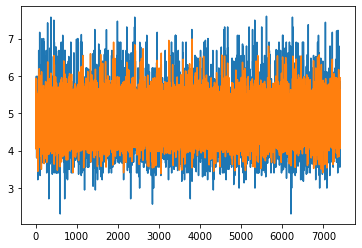

Train error:  0.21287680700047623
Test error:  0.21199846740199849

Round:  7

R2 score :  0.5789531214268845


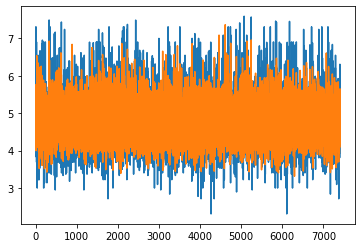

Train error:  0.21394372960864932
Test error:  0.2095908443344306

Round:  8

R2 score :  0.5759126173431652


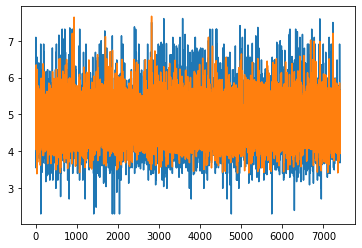

Train error:  0.2127078204415363
Test error:  0.21890740419500784

Round:  9

R2 score :  0.5709731845961172


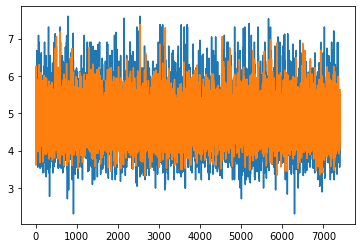

Train error:  0.21310251137389055
Test error:  0.21525959442423231

Round:  10

R2 score :  0.5764292904363313


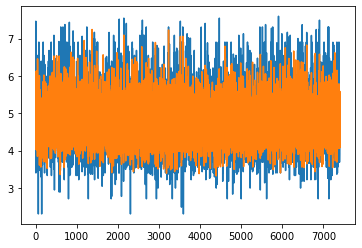

Train error:  0.2125938848415118
Test error:  0.22528955133933204


Ridge Regression
Train MSEs
[0.21406588758091624, 0.21412626567407503, 0.21317099247032004, 0.2123710082068661, 0.21403631861741515, 0.21287680700047623, 0.21394372960864932, 0.2127078204415363, 0.21310251137389055, 0.2125938848415118]
Test MSEs
[0.2133136840062146, 0.2081773086996482, 0.21124125715258094, 0.21861559947903839, 0.20724752893467535, 0.21199846740199849, 0.2095908443344306, 0.21890740419500784, 0.21525959442423231, 0.22528955133933204]
R2 scores
[0.5824500429131247, 0.5933070340902122, 0.592777732267407, 0.5936080406846497, 0.5978994322993347, 0.5791029379947321, 0.5789531214268845, 0.5759126173431652, 0.5709731845961172, 0.5764292904363313]

Ridge Regression Results
Train MSE after 10-fold CV:  0.21329952258156565
Test MSE after 10-fold CV:  0.2139641239967159
R2 score after 10-fold CV:  0.584141343405196


In [24]:
# Run Ridge Regression

ridge_test_list, ridge_train_list, ridge_r2_score = [], [], []

# Perform 10 fold cross validation
kf, index = KFold(n_splits=10), 1
train_error_ridge, test_error_ridge, r2_score_avg_ridge = 0, 0, 0

for train_index, test_index in kf.split(data):
  print("Round: ",str(index))
  X_train, X_test = data.loc[train_index], data.loc[test_index]
  y_train, y_test = labels.loc[train_index], labels.loc[test_index]

  print()

  train_mse_ridge,test_mse_ridge, r2_score_ridge = ridge_reg_model(X_train, X_test, y_train, y_test)
  ridge_test_list.append(test_mse_ridge)
  ridge_train_list.append(train_mse_ridge)
  ridge_r2_score.append(r2_score_ridge)

  print()

  train_error_ridge += train_mse_ridge
  test_error_ridge += test_mse_ridge
  r2_score_avg_ridge += r2_score_ridge
  index += 1

print()

print ("Ridge Regression")
print("Train MSEs")
print(ridge_train_list)
print("Test MSEs")
print(ridge_test_list)
print("R2 scores")
print(ridge_r2_score)

print()

print ("Ridge Regression Results")
print("Train MSE after 10-fold CV: ", str(train_error_ridge/10))
print("Test MSE after 10-fold CV: ", str(test_error_ridge/10))
print("R2 score after 10-fold CV: ", str(r2_score_avg_ridge/10))

# Random Forest Regression

In [25]:
def randForest(data_train, data_test, labels_train, labels_test):
  rf = RandomForestRegressor(n_estimators = 15, max_depth = 8, max_features = 'auto', min_samples_leaf = 10)
  
  rand_forest = rf.fit(data_train, labels_train)
  labels_pred, train_mse, test_mse, r2_Score = results(rand_forest, data_train, data_test, labels_train, labels_test) 

  print("R2 score : ", r2_Score)

  df=pd.DataFrame({'x': range(len(labels_test)), 'test': labels_test, 'predicted': labels_pred})
  plt.plot( 'x', 'test', data=df)
  plt.plot( 'x', 'predicted', data=df)
  plt.show()

  print("Train error: ",train_mse)
  print("Test error: ",test_mse)

  return train_mse,test_mse,r2_Score

Round:  1

R2 score :  0.6299991327971441


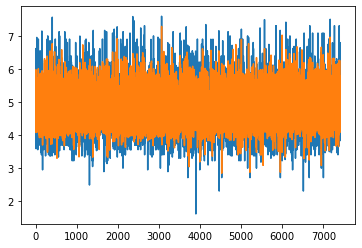

Train error:  0.1722240474405438
Test error:  0.18902228758249875

Round:  2

R2 score :  0.6573506324919904


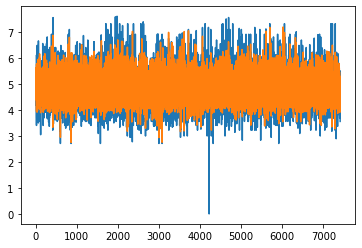

Train error:  0.17394059699317815
Test error:  0.17539477968565817

Round:  3

R2 score :  0.6578057881976054


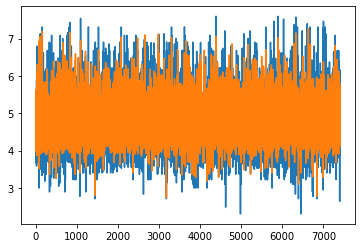

Train error:  0.1741922751249019
Test error:  0.1775087985584852

Round:  4

R2 score :  0.6497978744272732


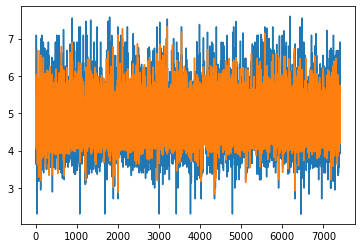

Train error:  0.1733068645653593
Test error:  0.1883886869954204

Round:  5

R2 score :  0.6597559006580127


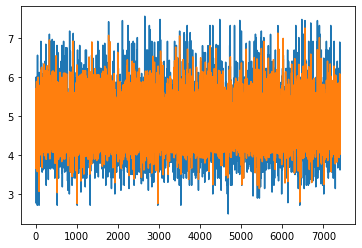

Train error:  0.174130118449243
Test error:  0.1753659519220679

Round:  6

R2 score :  0.648806599910159


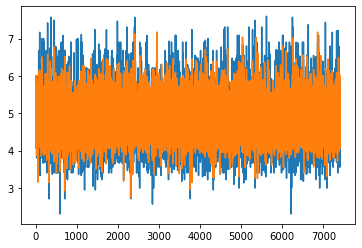

Train error:  0.17423656302357673
Test error:  0.1768899555298187

Round:  7

R2 score :  0.6303776205689798


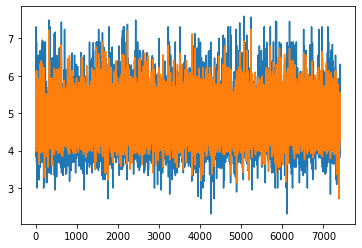

Train error:  0.17402571124597985
Test error:  0.18399249711192453

Round:  8

R2 score :  0.6432417808660501


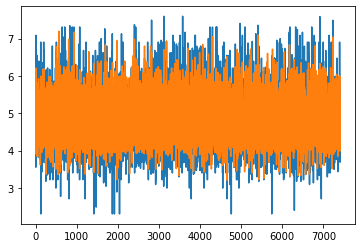

Train error:  0.17427589919175315
Test error:  0.18415312237440865

Round:  9

R2 score :  0.6403862294317589


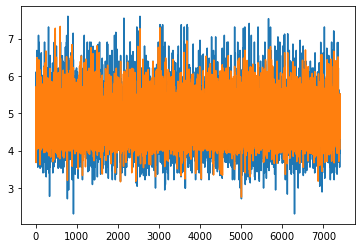

Train error:  0.1743256835912972
Test error:  0.1804323450715196

Round:  10

R2 score :  0.6427578659463262


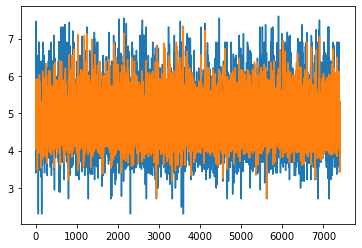

Train error:  0.17294723370261325
Test error:  0.1900105892198383


Random Forest
Train MSEs
[0.1722240474405438, 0.17394059699317815, 0.1741922751249019, 0.1733068645653593, 0.174130118449243, 0.17423656302357673, 0.17402571124597985, 0.17427589919175315, 0.1743256835912972, 0.17294723370261325]
Test MSEs
[0.18902228758249875, 0.17539477968565817, 0.1775087985584852, 0.1883886869954204, 0.1753659519220679, 0.1768899555298187, 0.18399249711192453, 0.18415312237440865, 0.1804323450715196, 0.1900105892198383]
R2 scores
[0.6299991327971441, 0.6573506324919904, 0.6578057881976054, 0.6497978744272732, 0.6597559006580127, 0.648806599910159, 0.6303776205689798, 0.6432417808660501, 0.6403862294317589, 0.6427578659463262]

Random Forest Results
Train MSE after 10-fold CV:  0.17376049933284463
Test MSE after 10-fold CV:  0.182115901405164
R2 score after 10-fold CV:  0.6460279425295299


In [26]:
# Run Random Forest Regression

rf_test_list, rf_train_list, rf_r2_score = [], [], []

# Perform 10 fold cross validation
kf, index = KFold(n_splits=10), 1
train_error_rf, test_error_rf, r2_score_avg_rf = 0, 0, 0

for train_index, test_index in kf.split(data):
  print("Round: ",str(index))
  X_train, X_test = data.loc[train_index], data.loc[test_index]
  y_train, y_test = labels.loc[train_index], labels.loc[test_index]

  print()

  train_mse_rf,test_mse_rf, r2_score_rf = randForest(X_train, X_test, y_train, y_test)
  rf_test_list.append(test_mse_rf)
  rf_train_list.append(train_mse_rf)
  rf_r2_score.append(r2_score_rf)

  print()

  train_error_rf += train_mse_rf
  test_error_rf += test_mse_rf
  r2_score_avg_rf += r2_score_rf
  index += 1

print()

print ("Random Forest")
print("Train MSEs")
print(rf_train_list)
print("Test MSEs")
print(rf_test_list)
print("R2 scores")
print(rf_r2_score)

print()

print ("Random Forest Results")
print("Train MSE after 10-fold CV: ", str(train_error_rf/10))
print("Test MSE after 10-fold CV: ", str(test_error_rf/10))
print("R2 score after 10-fold CV: ", str(r2_score_avg_rf/10))

# Result Comparison of each model using MSE and R2 score

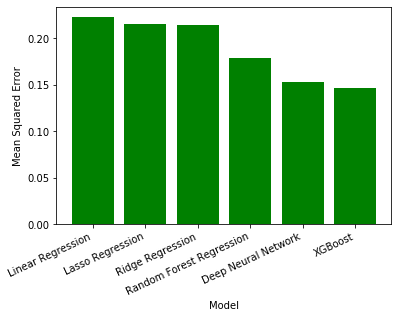

In [27]:
labels = np.array(['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Random Forest Regression', 'Deep Neural Network', 'XGBoost'])
errors = np.array([0.223, 0.215, 0.214, 0.179, 0.153, 0.146])
scores = np.array([0.56, 0.58, 0.59, 0.65, 0.59, 0.72])

# Arrange bars
pos = np.arange(errors.shape[0])
srt = np.argsort(-errors)

# Plots Mean Absolute Variance bars across functions
plt.figure()
plt.bar(pos, errors[srt], align = 'center', color = 'green')
plt.xticks(pos, labels[srt])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
# plt.title('Mean Square Error Model Comparison')
# plt.ylim(0,0.25)
plt.xticks(rotation=25, ha='right')
plt.show()

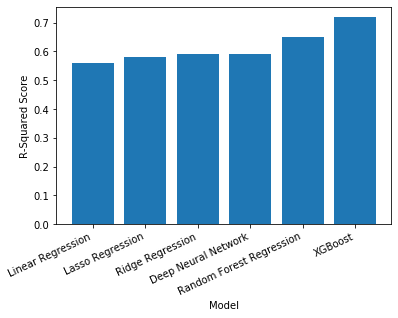

In [28]:
# Arrange bars
pos = np.arange(scores.shape[0])
srt = np.argsort(scores)

# Plots Mean Absolute Variance bars across functions
plt.figure()
plt.bar(pos, scores[srt], align = 'center')
plt.xticks(pos, labels[srt])
plt.xlabel('Model')
plt.ylabel('R-Squared Score')
# plt.title('R^2 Score Model Comparison')
# plt.ylim(0.25,0.75)
plt.xticks(rotation=25, ha='right')
plt.show()